# Project 1 - World Happiness_Longitude & Latitude

In [1]:
#Import dependencies


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import gmaps
import os


#Import API key

from api_key import g_key

#Create an output file to hold png.files

outputs = "output_png/plots.csv"


In [2]:
#Bring in resource files

world_happiness_path ="Resource/WHR2015-21 (2).csv"
long_lat_path = "Resource/Long_Lat.csv"

# Read resource files

world_happiness_data = pd.read_csv(world_happiness_path)
long_lat_data = pd.read_csv(long_lat_path)


#Display resource files

world_happiness_data.head()


,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [3]:
#Display long & latigude 

long_lat_data.head()

# df.rename(columns = {'y':'year'})
# Rename the columns of a DataFrame

Updatelong_lat = long_lat_data.rename(columns = {'name':'Country', 'country':'Country Code', 'latitude':'Latitude','longitude':'Longitude'})

#change index to Country

Updatelong_lat1 = Updatelong_lat.set_index("Country")

Updatelong_lat1.head()


,Country Code,Latitude,Longitude
Country,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953
Antigua and Barbuda,AG,17.060816,-61.796428
Anguilla,AI,18.220554,-63.068615


In [4]:
#Get total count of countries to ensure no duplicate countries (the same country with two differnt spellings)

numCountries = (len(world_happiness_data["Country"].unique()))

CountryCountDF = pd.DataFrame({"Number Countries": [numCountries]})

CountryCountDF

,Number Countries
0,166


In [5]:
#sort happiness data by rank, just taking a look

world_happiness_data.sort_values('Rank')

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.5870,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
626,Finland,7.7689,1,2019,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
158,Denmark,7.5260,1,2016,1.441784,1.163745,0.795040,0.579413,0.361710,0.444532
782,Finland,7.8087,1,2020,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
315,Norway,7.5370,1,2017,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
...,...,...,...,...,...,...,...,...,...,...
155,Syria,3.0060,156,2015,8.609065,0.586477,64.805290,0.465099,0.302974,0.666497
781,South Sudan,2.8526,156,2019,0.305843,0.574936,0.294648,0.010214,0.202084,0.090529
156,Burundi,2.9050,157,2015,6.622705,0.561733,46.811268,0.428722,-0.045689,0.806447
314,Burundi,2.9050,157,2016,0.068310,0.234424,0.157467,0.043201,0.202902,0.094188


In [6]:

# Add the Country Code to the World Happiness Data

worldhappiness_merged = pd.merge(world_happiness_data,Updatelong_lat, 
        how='left', on='Country')

worldhappiness_merged.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,CH,46.818188,8.227512
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,IS,64.963051,-19.020835
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,DK,56.263920,9.501785
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,NO,60.472024,8.468946
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,CA,56.130366,-106.346771


In [7]:
#Check number of unique countries again. 

numCountries = (len(worldhappiness_merged["Country"].unique()))

numCountries

166

In [8]:
#Check for null values in the Longitude Latitude columns


worldhappiness_merged.isnull().sum()



Country                          0
Score                            0
Rank                             0
Year                             0
Logged GDP per capita            0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Perceptions of corruption        0
Country Code                    34
Latitude                        28
Longitude                       28
dtype: int64

In [9]:
# display null values

worldhappiness_merged1 = worldhappiness_merged[worldhappiness_merged.isna().any(axis=1)]


worldhappiness_merged1.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
90,Somaliland region,5.057,91,2015,7.153599,0.786291,54.571739,0.758219,0.342846,0.333832,NaN,NaN,NaN
92,Macedonia,5.007,93,2015,9.391803,0.807589,65.293579,0.633711,-0.012261,0.881373,NaN,NaN,NaN
119,Congo (Kinshasa),4.517,120,2015,6.575788,0.807116,42.261856,0.530761,0.019171,0.845019,NaN,NaN,NaN
128,Myanmar,4.307,129,2015,7.406868,0.684642,56.152130,0.733889,0.714599,0.664478,NaN,NaN,NaN
138,Congo (Brazzaville),3.989,139,2015,8.656470,0.665293,49.938667,0.709689,-0.138894,0.780756,NaN,NaN,NaN


In [10]:
#unique null countries

nullCountries = (worldhappiness_merged1["Country"].unique())


nullCountries

array(['Somaliland region', 'Macedonia', 'Congo (Kinshasa)', 'Myanmar',
       'Congo (Brazzaville)', 'Namibia'], dtype=object)

In [11]:
#update the names in the Country Code list to match the names in the World Happiness Data so that there are no null values 
#for longitude & latitude columns. 



NewLong_Lat = Updatelong_lat1.rename(index ={"Congo [DRC]":"Congo (Kinshasa)",
                      "Congo [Republic]":"Congo (Brazzaville)",
                      "Côte d'Ivoire":"Ivory Coast",
                       "Cyprus":"Northern Cyprus",
                      "Somaliland":"Somaliland region",
                      "Macedonia [FYROM]":"Macedonia",
                      "Myanmar [Burma]":"Myanmar","Namibia":"Namibia",                                  
                        "Cyprus":"Cyprus"})

NewLong_Lat.head()


,Country Code,Latitude,Longitude
Country,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953
Antigua and Barbuda,AG,17.060816,-61.796428
Anguilla,AI,18.220554,-63.068615


In [12]:

# Add the Country Code, Longitude, and Latitude back to the World Happiness Data

newworldhappiness = pd.merge(world_happiness_data,NewLong_Lat, 
        how='left', on='Country')

newworldhappiness.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,CH,46.818188,8.227512
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,IS,64.963051,-19.020835
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,DK,56.263920,9.501785
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,NO,60.472024,8.468946
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,CA,56.130366,-106.346771


In [13]:
#Check for null values again

null_worldhappiness = newworldhappiness[newworldhappiness.isna().any(axis=1)]

null_worldhappiness.head()



,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
90,Somaliland region,5.0570,91,2015,7.153599,0.786291,54.571739,0.758219,0.342846,0.333832,NaN,10.63340,43.32950
254,Somaliland region,5.0570,97,2016,0.255577,0.758623,0.331076,0.391295,0.514791,0.367941,NaN,10.63340,43.32950
270,Namibia,4.5740,113,2016,0.932872,0.703618,0.347454,0.486138,0.077950,0.103976,NaN,-22.95764,18.49041
425,Namibia,4.5740,111,2017,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,NaN,-22.95764,18.49041
588,Namibia,4.4413,119,2018,0.873822,1.281352,0.365404,0.519292,0.050628,0.064182,NaN,-22.95764,18.49041


In [14]:
nullCountries = (null_worldhappiness["Country"].unique())

nullCountries

array(['Somaliland region', 'Namibia'], dtype=object)

In [15]:
#Display newworldhappiness data, just taking a look.

newworldhappiness

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
0,Switzerland,7.5870,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,CH,46.818188,8.227512
1,Iceland,7.5610,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,IS,64.963051,-19.020835
2,Denmark,7.5270,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,DK,56.263920,9.501785
3,Norway,7.5220,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,NO,60.472024,8.468946
4,Canada,7.4270,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,CA,56.130366,-106.346771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,3.5118,145,2021,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,LS,-29.609988,28.233608
1080,Botswana,3.4665,146,2021,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,BW,-22.328474,24.684866
1081,Rwanda,3.4147,147,2021,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,RW,-1.940278,29.873888
1082,Zimbabwe,3.1448,148,2021,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,ZW,-19.015438,29.154857


In [16]:
#Create a dataframe that contains the average score and average score to use later in analysis

avgNewWorld=newworldhappiness.groupby("Country").mean()

avgNewWorld

,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Latitude,Longitude
Country,,,,,,,,,,,
Afghanistan,3.236229,149.857143,2018.0,3.454153,0.456203,22.247471,0.238827,0.134724,0.409046,33.939110,67.709953
Albania,4.794671,104.285714,2018.0,4.574642,0.723352,29.848359,0.532099,0.072841,0.401986,41.153332,20.168331
Algeria,5.461443,77.142857,2018.0,4.637251,0.962443,27.950666,0.305708,-0.016752,0.390652,28.033886,1.659626
Angola,3.872200,140.000000,2016.5,2.833737,0.910296,11.278880,0.105177,0.039511,0.267078,-11.202692,17.873887
Argentina,6.314471,38.285714,2018.0,4.868446,1.159314,29.712198,0.622898,-0.025744,0.391899,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,5.371657,80.714286,2018.0,4.577921,1.146586,28.665407,0.371599,-0.047406,0.385807,6.423750,-66.589730
Vietnam,5.219686,88.000000,2018.0,4.182991,1.035669,29.222221,0.721581,0.076565,0.392747,14.058324,108.277199
Yemen,3.616286,145.571429,2018.0,3.641269,0.852567,24.067261,0.388705,-0.012974,0.385591,15.552727,48.516388


In [17]:
#Create variables for fields that will be used in analysis.

Lat = newworldhappiness["Latitude"]
Long = newworldhappiness["Longitude"]
Score = newworldhappiness["Score"]
Rank = newworldhappiness ["Rank"]

avgLat = avgNewWorld["Latitude"]
avgLong = avgNewWorld["Longitude"]
avgScore = avgNewWorld["Score"]
avgRank = avgNewWorld["Rank"]


Latitude vs. Happiness Score

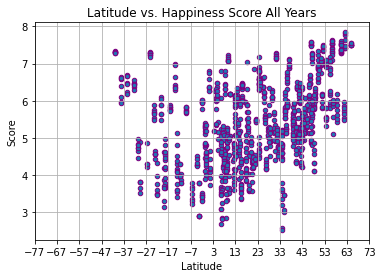

In [18]:
newworldhappiness.plot.scatter(x="Latitude", y="Score",edgecolor="purple")

plt.title ("Latitude vs. Happiness Score All Years")
plt.ylabel("Score")
plt.xlabel("Latitude")
plt.xticks(range(int(-77.25),int(77.55),10))
plt.grid(True)

plt.savefig("output_png/Lat1.png")

Longitude vs. Happiness Score

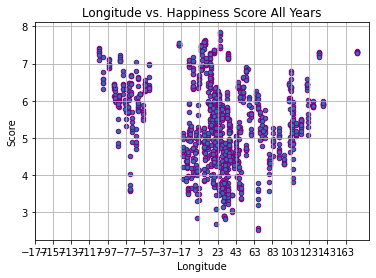

In [19]:
#Scatter plot Longitude


newworldhappiness.plot.scatter(x="Longitude", y="Score",edgecolor="purple")

plt.title ("Longitude vs. Happiness Score All Years")
plt.ylabel("Score")
plt.xlabel("Longitude")
plt.xticks(range(int(-177),int(179),20))
plt.grid(True)

plt.savefig("output_png/Long1.png")


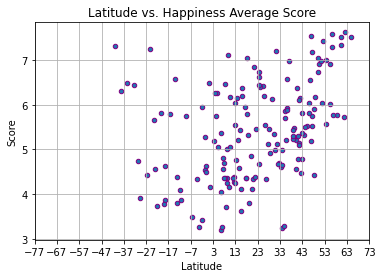

In [20]:
#Scatter plot based on Latitude vs. Happiness Average Score


avgNewWorld.plot.scatter(x="Latitude", y="Score",edgecolor="purple")

plt.title ("Latitude vs. Happiness Average Score")
plt.ylabel("Score")
plt.xlabel("Latitude")
plt.xticks(range(int(-77.25),int(77.55),10))
plt.grid(True)

plt.savefig("output_png/Lat2.png")

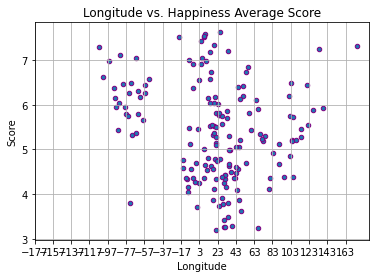

In [21]:
#Scatter plot based on Longitude vs. Happinesss Average Score


avgNewWorld.plot.scatter(x="Longitude", y="Score",edgecolor="purple")

plt.title ("Longitude vs. Happiness Average Score")
plt.ylabel("Score")
plt.xlabel("Longitude")
plt.xticks(range(int(-177),int(179),20))
plt.grid(True)

plt.savefig("output_png/Long2.png")

In [22]:
# Function for Linear regression plots 

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     Graph plot
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r value is:{rvalue**2}") 
    plt.xticks(range(int(-77.25),int(77.55),10))
    plt.show()


In [23]:
#Creating north and south ranges

north_hem_df = newworldhappiness.loc[(newworldhappiness["Latitude"] >=0)]
south_hem_df = newworldhappiness.loc[(newworldhappiness["Latitude"] <=0)]


Northern & Southern Hemisphere vs. Happiness Score



The r value is:0.23378502930744874


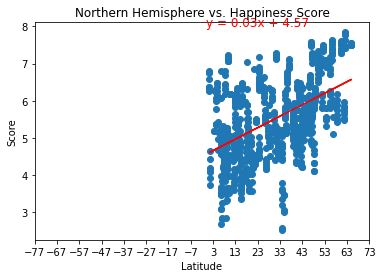

<Figure size 432x288 with 0 Axes>

In [24]:
# Northern Hemisphere vs. Happiness Score Scatter Plot


x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Score"]
plt.title("Northern Hemisphere vs. Happiness Score")

plot_linear_regression(x_values,y_values,'Score',(0,8))

plt.savefig("output_png/NoReg.1.png")


The r value is:0.23024794596516496


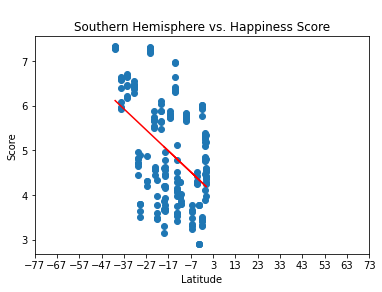

<Figure size 432x288 with 0 Axes>

In [25]:
#Southern Hemisphere vs. Score Scatter Plot

x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Score"]
plt.title("Southern Hemisphere vs. Happiness Score")

plot_linear_regression(x_values,y_values,'Score',(0,8))

plt.savefig("output_png/SoReg.1.png")

East and West vs. Happiness Score

In [26]:
#Creating east and west ranges

east_hem_df = newworldhappiness.loc[(newworldhappiness["Longitude"] >=0)]
west_hem_df = newworldhappiness.loc[(newworldhappiness["Longitude"] <=0)]


In [27]:
# Function for Linear regression plots 

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     Graph plot
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Longitude")
    plt.ylabel(title)
    print(f"The r value is:{rvalue**2}") 
    plt.xticks(range(int(-177),int(179),20))
    plt.show()

The r value is:0.0025876908557734505


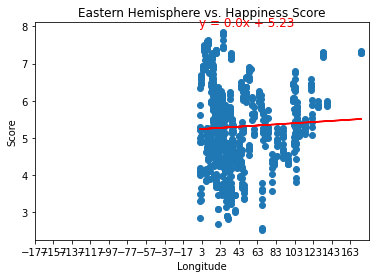

<Figure size 432x288 with 0 Axes>

In [28]:
#Plot the Eastern Hemisphere vs. Happiness Score Scatter Plot

x_values = east_hem_df["Longitude"]
y_values = east_hem_df["Score"]
plt.title("Eastern Hemisphere vs. Happiness Score")

plot_linear_regression(x_values,y_values,'Score',(0,8))

plt.savefig("output_png/RegE.1.png")


The r value is:0.22350810653919237


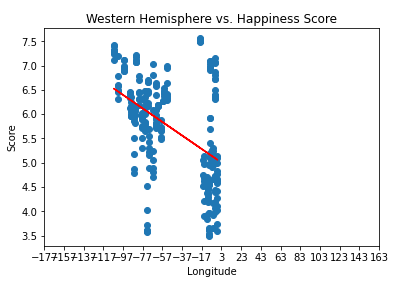

<Figure size 432x288 with 0 Axes>

In [39]:
#Plot the Western hemisphere vs. Happiness Score Scatter Plot


x_values = west_hem_df["Longitude"]
y_values = west_hem_df["Score"]
plt.title("Western Hemisphere vs. Happiness Score")

plot_linear_regression(x_values,y_values,'Score',(0,8))

plt.savefig("output_png/RegW.1.png")

LONG_LAT HEATMAP

In [30]:
newworldhappiness

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Latitude,Longitude
0,Switzerland,7.5870,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,CH,46.818188,8.227512
1,Iceland,7.5610,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,IS,64.963051,-19.020835
2,Denmark,7.5270,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,DK,56.263920,9.501785
3,Norway,7.5220,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,NO,60.472024,8.468946
4,Canada,7.4270,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,CA,56.130366,-106.346771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,3.5118,145,2021,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,LS,-29.609988,28.233608
1080,Botswana,3.4665,146,2021,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,BW,-22.328474,24.684866
1081,Rwanda,3.4147,147,2021,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,RW,-1.940278,29.873888
1082,Zimbabwe,3.1448,148,2021,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,ZW,-19.015438,29.154857


In [31]:
#Config gmap key

gmaps.configure(api_key=g_key)


In [37]:
# Setting up the heatmap

Countries = newworldhappiness[["Latitude","Longitude"]]

Score = newworldhappiness["Score"]
fig= gmaps.figure()

#Add heat layer

heat_layer = gmaps.heatmap_layer(Countries,weights=Score,dissipating=False,max_intensity=400,point_radius=5)
fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [40]:
plt.savefig("output_png/Heatmap.1.png")

<Figure size 432x288 with 0 Axes>